# Eksplorasi Library Decision Tree pada Jupyter Notebook
Anggota (K03):
- Benidictus Galih Mahar Putra  - 13519159
- Alvin Wilta                   - 13519163

## Load Datasets

Library yang digunakan pada notebook ini adalah:
- pandas (operasi sederhana pada dataset)
- sklearn (modul machine learning)
- graphviz (visualisasi tree id3)
- id3 (melakukan algoritma id3)
- matplotlib (visualisasi tree decision tree classification)
- six, sys (menangani konflik dari library id3)

In [210]:
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz as export_graphviz_sk
from sklearn.linear_model import LogisticRegression
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator, export_graphviz


In [211]:
# load datasets
cancer = datasets.load_breast_cancer(as_frame=True)
dttennis = pd.read_csv("../data/play_tennis.csv")

In [212]:
# copy a dataset 
dtcancer = cancer.data.copy()
dtcancer['res'] = cancer.target

In [213]:
# Inisialisasi datagrame kosong untuk rekap semua nilai skor
recap = pd.DataFrame(columns=['Pembelajaran','Dataset','Tipe','Nilai'])

In [214]:
# declare function
def addToRecap(pemb, cancer_acc, cancer_f1, tennis_acc, tennis_f1):
    if len(recap.index) != 0:
        if (recap['Pembelajaran'].loc[len(recap.index)-1] == pemb):
            recap.drop(recap.tail(4).index, inplace=True)
    c = 'Cancer'
    t = 'Tennis'
    acc = 'Accuracy Score'
    f1 = 'F1 Score'
    i = len(recap)
    recap.loc[i] = [pemb, c, acc, cancer_acc]
    recap.loc[i+1] = [pemb, c, f1, cancer_f1]
    recap.loc[i+2] = [pemb, t, acc, tennis_acc]
    recap.loc[i+3] = [pemb, t, f1, tennis_f1]

def simpleDescribe(df: datasets):
    print('Jumlah kolom: ' + str(len(df.columns)))
    print('Jumlah baris: ' + str(len(df)))
    print()
    print('Kolom pada tabel:')
    print(df.columns.tolist())

def printScore(acc, f1):
    print('Accuracy   :', acc)
    print('F1 Score   :', f1)

def printSummary(pemb, cacc, cf1, tacc, tf1):
    addToRecap(pemb, cacc, cf1, tacc, tf1)
    print('===============================')
    print('Cancer Dataset:')
    print('Accuracy   :', cacc)
    print('F1 Score   :', cf1)
    print('===============================')
    print('Tennis Dataset')
    print('Accuracy   :', tacc)
    print('F1 Score   :', tf1)
    print('===============================')


### Data Breast Cancer

Sampel data kanker payudara yang disediakan oleh data internal sklearn:

In [215]:
dtcancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,res
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [216]:
simpleDescribe(dtcancer)

Jumlah kolom: 31
Jumlah baris: 569

Kolom pada tabel:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'res']


### Data Tennis
Sampel data tennis yang didapatkan dari file eksternal pada folder data: 

In [217]:
dttennis.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [218]:
simpleDescribe(dttennis)

Jumlah kolom: 6
Jumlah baris: 14

Kolom pada tabel:
['day', 'outlook', 'temp', 'humidity', 'wind', 'play']


Terdapat beberapa hal penting yang bisa dilihat disini, yaitu:
1. Kolom 'day' pada dataset merupakan data hari ke-sekian dan merupakan urutan hari dalam minggu. Untuk bisa mengetahui pola atau pengaruh 'urutan hari' dari sebuah tabel terhadap play adalah dengan melakukan operasi modulo 7 untuk melihat pengaruh hari (senin, selasa, dll) terhadap atribut play. Akan tetapi karena data yang dipakai sangat kecil (14 record) maka kolom ini dapat di-drop karena tidak terlalu berpengaruh.
2. Data pada dataset tersebut masih berupa string dan perlu untuk di-encode sesuai dengan kategorinya

In [219]:
dttennis.drop(columns=['day'], inplace=True)
dttennis.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


#### Encode Play Tennis Column

In [220]:
le = LabelEncoder()
dttennis_old = dttennis.copy()
for col in dttennis_old[1:]:
    dttennis[col] = le.fit_transform(dttennis_old[col])
dttennis.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


## Split Dataset

### Split into test and train

Memisahkan dataset menjadi 2 bagian, test dan train. Pembagian dilakukan secara random dengan 80% data train dan 20% data test.

In [221]:
# Constant variables
# Random state = memastikan bahwa setiap randomness bisa direproduksi kembali sesuai dengan int yang di-pass pada function train_test_split.
randState = 10
# Ukuran test dan train
testSize = 0.2
trainSize = 0.8

In [222]:
# Dataset cancer
ctrain, ctest = model_selection.train_test_split(dtcancer, test_size=testSize, train_size=trainSize, random_state=randState)


# Dataset tennis
tntrain, tntest = model_selection.train_test_split(dttennis, test_size=testSize, train_size=trainSize, random_state=randState)

Kemudian untuk memisahkan atribut yang akan digunakan sebagai parameter dan atribut prediksi, dataset awal akan dibagi menjadi 4 bagian:
- **x train:** feature yang akan digunakan untuk train model
- **y train:** ground truth (hasil asli)
- **x test:** feature yang digunakan untuk diuji oleh model
- **y test:** data yang digunakan untuk memvalidasi hasil prediksi

### Dataset Cancer

In [223]:
y = dtcancer['res']
x = dtcancer.drop('res', axis=1)

x_ctrain, x_ctest, y_ctrain, y_ctest = model_selection.train_test_split(x, y, test_size=testSize, train_size=trainSize, random_state=randState)

### Dataset Tennis

In [224]:
y = dttennis['play']
x = dttennis.drop('play', axis=1)

x_tntrain, x_tntest, y_tntrain, y_tntest = model_selection.train_test_split(x, y, test_size=testSize, train_size=trainSize, random_state=randState)

***

# Pembelajaran Mesin

Pada bagian ini akan ada 2 hal yang dibahas, yaitu akurasi model dan nilai f1 dari model. Berikut adalah definisi dari masing-masing skor:

Akurasi model:
> Perbandingan antara jumlah data yang benar diprediksi dengan total jumlah data secara keseluruhan. Akurasi memiliki nilai maksimal 1 dan nilai minimal 0. 

Nilai F1:
> Sebuah pengukuran akurasi model terhadap dataset dan biasanya digunakan dalam klasifikasi biner. Nilai F1 juga merupakan sebuah cara untuk menggabungkan *precision* dan *recall* dari sebuah model. Recall dan precision akan berbanding lurus dengan nilai F1.

## Decision Tree Classifier

**Decision Tree Classifier** adalah sebuah metode supervised learning yang digunakan untuk memberikan model yang akan membagi data bergantung dari parameter tertentu.

Tahap pembuatan DTC adalah:
1. Pilih atribut terbaik menggunakan ASM (Attribute Selection Measures)
2. Buat atribut tersebut menjadi decision node dan pecah dataset menjadi lebih kecil
3. Ulangi secara rekursif hingga kondisi berikut terpenuhi:
    - semua atribut sudah habis
    - tidak ada instansi lain lagi
    - semua tuple terdapat dalam nilai atribut yang sama

Banyak metode ASM yang bisa digunakan, tetapi ASM yang akan dipakai disini adalah *Entropy*.

### DTC - Breast Cancer Dataset

Terdapat 30 parameter yang digunakan antara lain:
- mean radius
- mean texture 
- mean perimeter 
- mean area 
- mean smoothness 
- mean compactness 
- mean concavity 
- mean concave points 
- mean symmetry 
- mean fractal dimension 
- radius error 
- texture error 
- perimeter error 
- area error 
- smoothness error 
- compactness error 
- concavity error 
- concave points error 
- symmetry error 
- fractal dimension error 
- worst radius 
- worst texture 
- worst perimeter 
- worst area 
- worst smoothness 
- worst compactness 
- worst concavity 
- worst concave points 
- worst symmetry 
- worst fractal dimension

Kemudian dilakukan prediksi dengan criterion berupa entropy pada kode di bawah ini dan didapatkan akurasi beserta F1 dari hasil training model untuk memprediksi kanker.

In [225]:
clf_c = DecisionTreeClassifier()
clf_c = clf_c.fit(x_ctrain,y_ctrain)
y_dtc_cpred = clf_c.predict(x_ctest)
c_dtc_acc = accuracy_score(y_ctest,y_cpred)
c_dtc_f1 = f1_score(y_ctest,y_cpred)
printScore(c_dtc_acc, c_dtc_f1)

Accuracy   : 0.956140350877193
F1 Score   : 0.9659863945578231


Berikut di bawah ini adalah ilustrasi decision tree yang dihasilkan dari pembelajaran mesin Decision Tree Classifier menggunakan library matplotlib. warna biru pada leaf node menandakan **benign**, sedangkan warna orange pada leaf node menandakan **malignant**

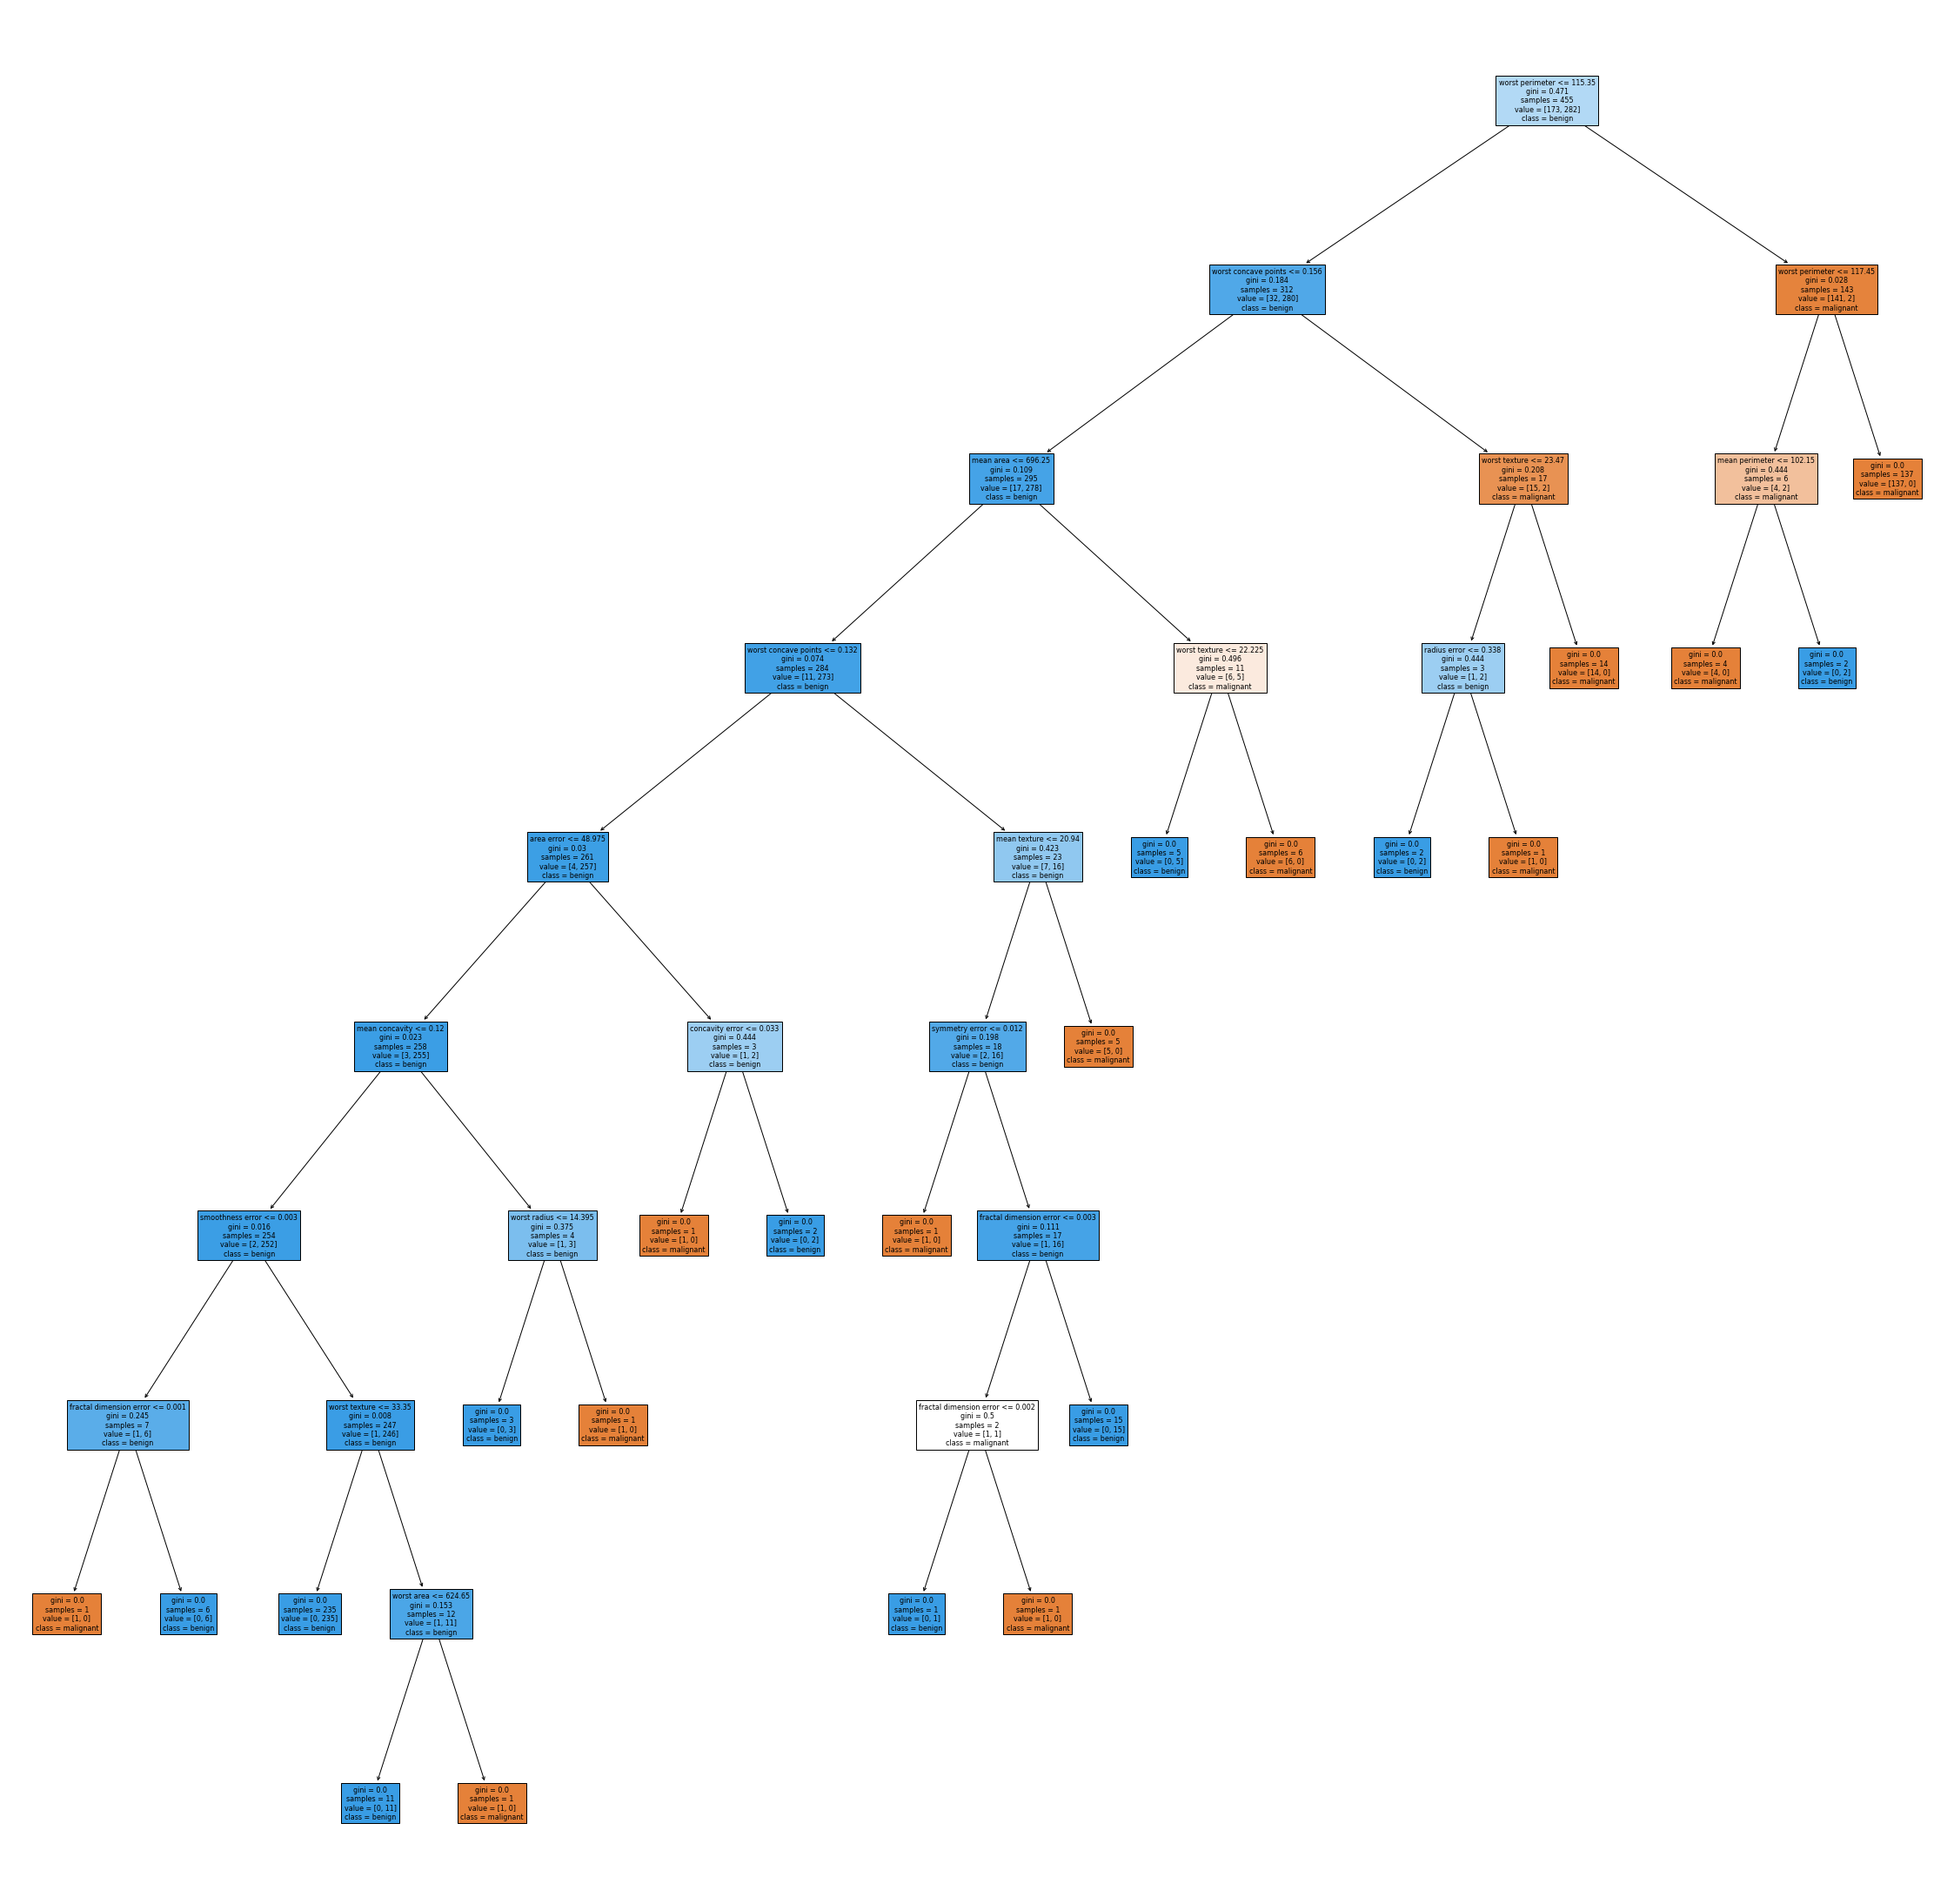

In [226]:
# Export text (textual)
# model = tree.export_text(clf_c)
# print(model)
fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf_c,feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)

Jalankan kode di bawah ini untuk menyimpan gambar figure:

In [227]:
fig.savefig("../img/cancer_dtc.png")

### DTC - Tennis Dataset

Terdapat 4 parameter yang digunakan, antara lain:
- outlook 
- temp 
- humidity 
- wind 

In [228]:
clf_t = DecisionTreeClassifier()
clf_t = clf_t.fit(x_tntrain, y_tntrain)
y_dtc_tnpred = clf_t.predict(x_tntest)
t_dtc_acc = accuracy_score(y_tntest,y_tnpred)
t_dtc_f1 = f1_score(y_tntest,y_tnpred)
printScore(t_dtc_acc, t_dtc_f1)


Accuracy   : 0.6666666666666666
F1 Score   : 0.6666666666666666


Berikut di bawah ini adalah ilustrasi decision tree yang dihasilkan dari pembelajaran mesin Decision Tree Classifier menggunakan library matplotlib pada dateset tennis. warna biru pada leaf node menandakan **No**, sedangkan warna orange pada leaf node menandakan **Yes**

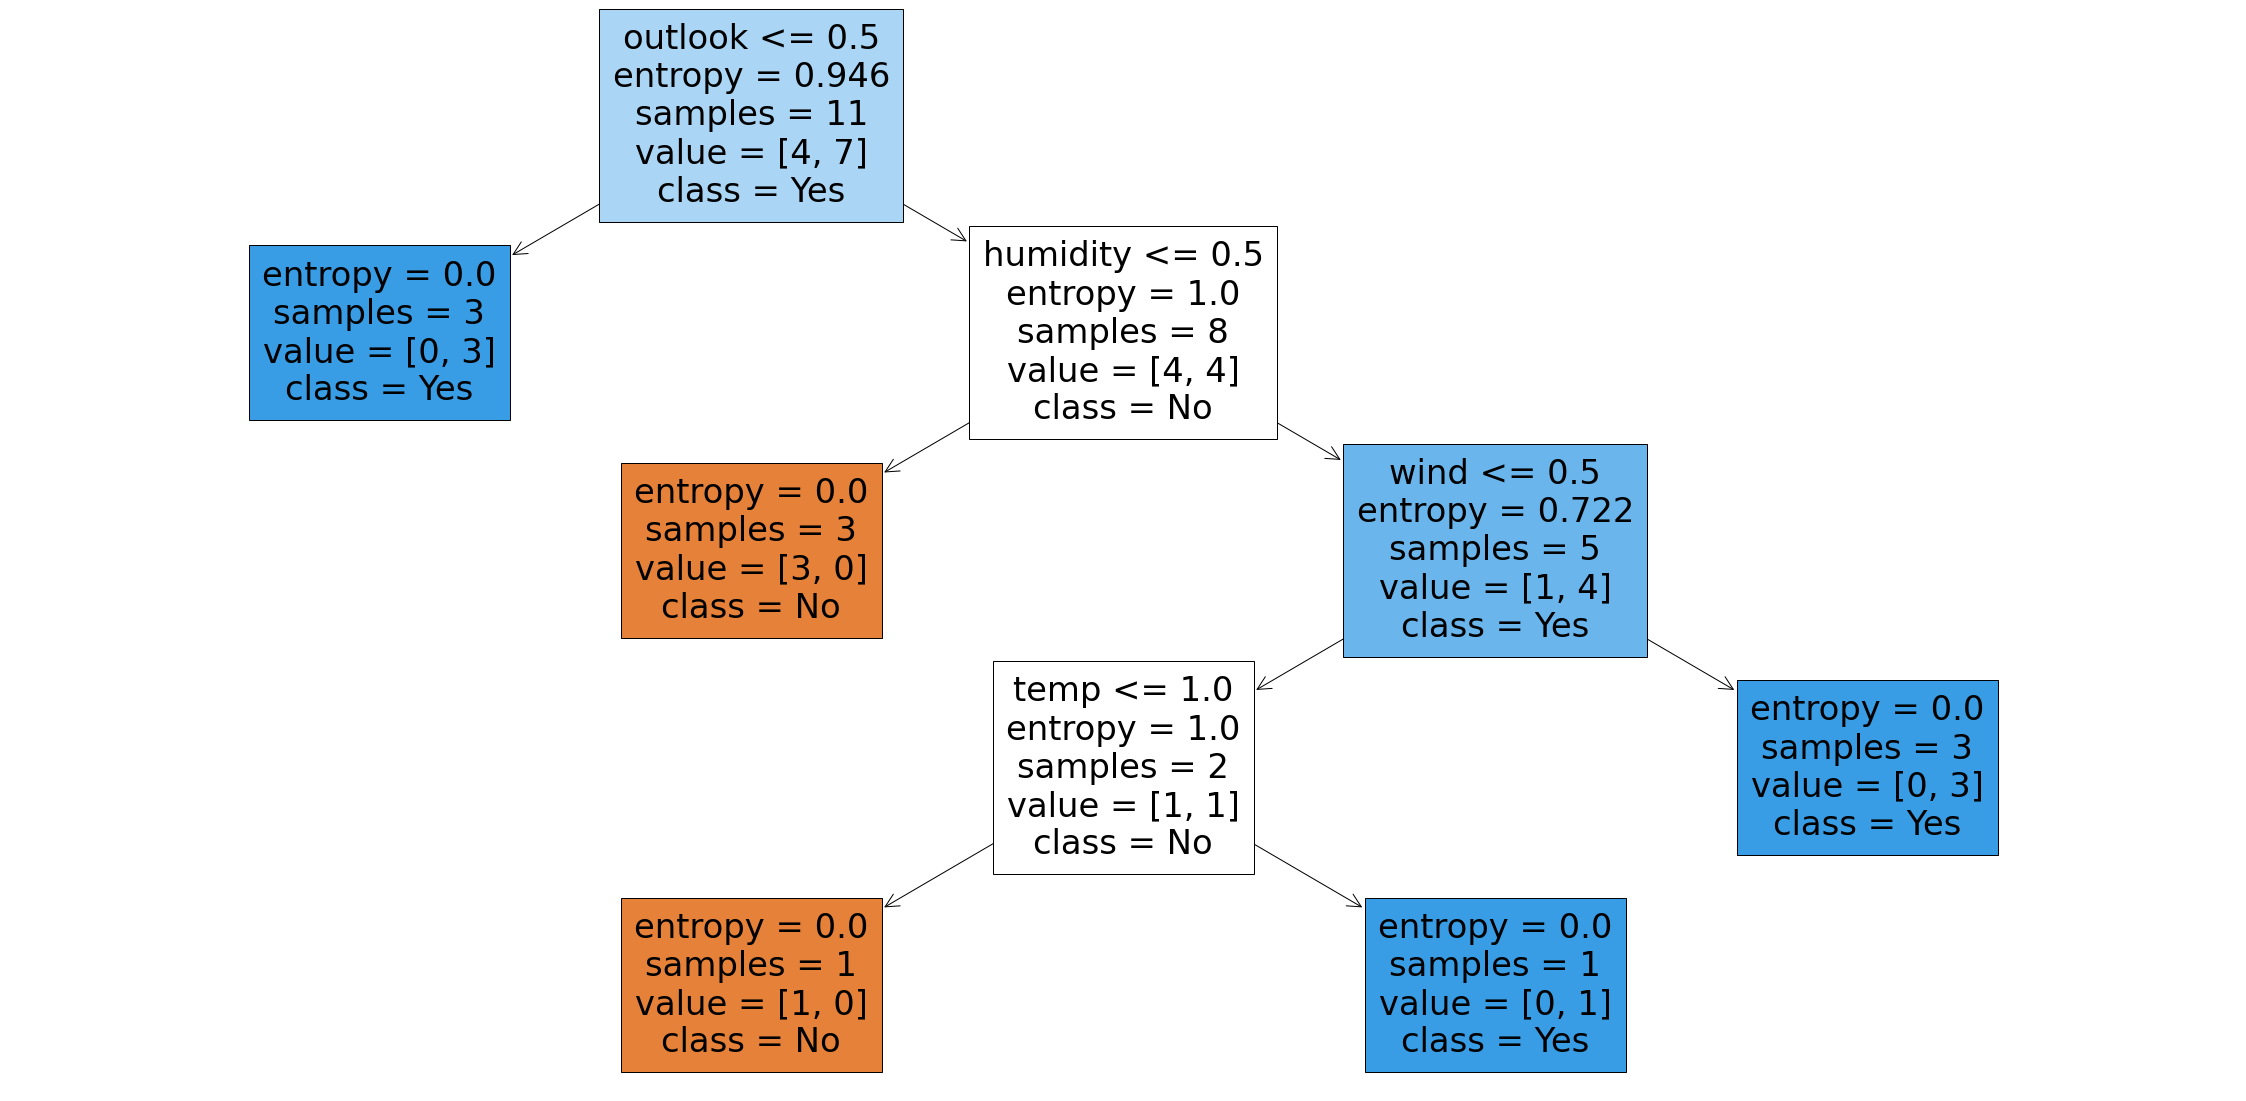

In [229]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf_t,feature_names=dttennis.columns[:-1], class_names=['No','Yes'], filled=True)

In [230]:
fig.savefig("../img/tennis_dtc.png")

### DTC - Analisis Prediksi

In [231]:
printSummary('DTC',c_dtc_acc, c_dtc_f1, t_dtc_acc, t_dtc_f1)

Cancer Dataset:
Accuracy   : 0.956140350877193
F1 Score   : 0.9659863945578231
Tennis Dataset
Accuracy   : 0.6666666666666666
F1 Score   : 0.6666666666666666


Dataset kanker:
- Dataset kanker memiliki akurasi yang cukup tinggi dengan skor akurasi >0.9 yang artinya memiliki akurasi mendekati 90%.
- Dataset kanker memiliki nilai F1 yang cukup tinggi dengan skor akurasi >0.9 yang artinya data cenderung masih seimbang sehingga false negative ataupun ataupun false positive bisa dihindari dengan menggunakan dataset saat ini untuk training.  

Dataset tennis:
- Dataset tennis memiliki akurasi yang cukup rendah dengan skor akurasi ~0.66. Hal ini juga bisa disebabkan karena sedikitnya dataset yang dimiliki sehingga kesalahan kecil akan sangat berdampak pada akurasi.
- Dataset tennis memiliki nilai F1 yang cukup rendah juga karena jumlah data pada dataset yang relatif sedikit sehingga perbedaan 1 record akan berpengaruh besar terhadap *outcome* dari hasil training.
- Hal ini banyak dipengaruhi oleh jumlah dataset yang digunakan saat ini, yaitu hanya 11 data dengan 4 parameter yang harus di fine-tune. 3 data lainnya digunakan untuk menguji model. Meskipun umumnya decision tree bisa ditrain menggunakan training set yang kecil, tetapi jumlah yang sangat kecil akan membuat model menjadi tidak akurat.

## ID3 Estimator

ID3 Algorithm - Iterative Dichotomiser 3
> Algoritma klasitikasi yang menggunakan pendekatan *greedy algorithm* untuk membentuk *decision tree* dengan mencari atribut yang memiliki *information gain* terbesar (atau entropi terkecil)

Tahapan dalam algoritma ID3:
1. Kalkulasi entropi dari dataset
2. Untuk setiap atribut/*feature*:
    1. Hitung entropi dari semua nilai kategorikalnya
    2. Hitung *information gain* dari featurenya
3. Cari *feature* dengan *information gain* terbesar
4. Ulangi hingga habis dan terbentuk decision tree yang diinginkan

Untuk ID3 seharusnya bisa menggunakan sklearn DecisionTreeClassifier dengan criterion='Entropy' dan akan menghasilkan hasil yang sama dengan menggunakan library pada [svaante/decision-tree-id3](https://github.com/svaante/decision-tree-id3). Akan tetapi dengan graphviz

### ID3 - Breast Cancer Dataset

In [232]:
estimator = Id3Estimator()
estimator = estimator.fit(x_ctrain, y_ctrain)
y_id3_cpred = estimator.predict(x_ctest)
c_id3_acc = accuracy_score(y_ctest, y_cpred)
c_id3_f1 = f1_score(y_ctest, y_cpred)
printScore(c_id3_acc, c_id3_f1)

Accuracy   : 0.956140350877193
F1 Score   : 0.9659863945578231


Berikut di bawah ini adalah ilustrasi decision tree yang dihasilkan dari pembelajaran mesin IM3 menggunakan library graphviz.

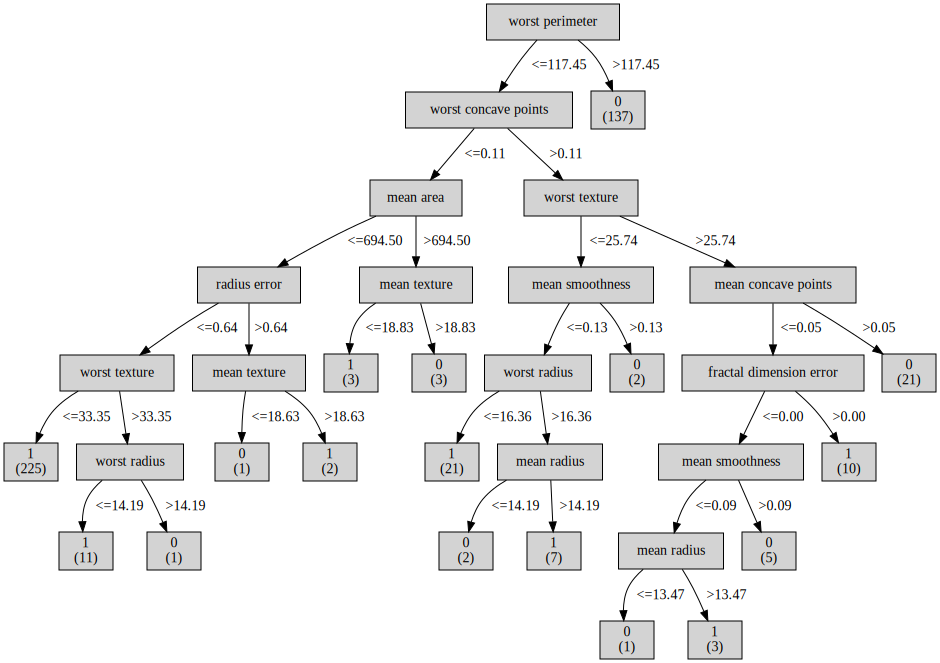

In [233]:
tree = export_graphviz(estimator.tree_, '../graph/c_id3.dot', cancer.feature_names)
graphviz.Source.from_file('../graph/c_id3.dot')

### ID3 - Tennis Dataset

In [234]:
estimator = Id3Estimator()
estimator = estimator.fit(x_tntrain, y_tntrain)
y_id3_tnpred = estimator.predict(x_tntest)
t_id3_acc = accuracy_score(y_tntest, y_tnpred)
t_id3_f1 = f1_score(y_tntest, y_tnpred)
printScore(t_id3_acc, t_id3_f1)

Accuracy   : 0.6666666666666666
F1 Score   : 0.6666666666666666


Berikut di bawah ini adalah ilustrasi decision tree yang dihasilkan dari pembelajaran mesin IM3 menggunakan library graphviz.

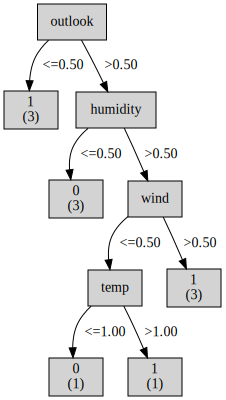

In [235]:
tree = export_graphviz(estimator.tree_, '../graph/t_id3.dot', dttennis.columns[:-1])
graphviz.Source.from_file('../graph/t_id3.dot')

### ID3 - Analisis Prediksi

In [236]:
printSummary('ID3',c_id3_acc, c_id3_f1, t_id3_acc, t_id3_f1)

Cancer Dataset:
Accuracy   : 0.956140350877193
F1 Score   : 0.9659863945578231
Tennis Dataset
Accuracy   : 0.6666666666666666
F1 Score   : 0.6666666666666666


Dataset kanker:
- Dataset kanker memiliki akurasi yang cukup tinggi dengan skor akurasi sekitar 0.9 yang artinya model yang dibentuk berhasil memprediksi ~90% dari dataset yang diberikan dengan benar.
- Dataset kanker memiliki nilai F1 yang cukup tinggi dengan skor akurasi sekitar 0.9 yang artinya data cenderung masih seimbang sehingga false negative ataupun ataupun false positive bisa dihindari dengan menggunakan dataset saat ini untuk training. 

Dataset tennis:
- Dataset tennis memiliki akurasi yang cukup rendah dengan skor akurasi ~0.66. Ini artinya hanya 66% data saja yang benar diprediksi.
- Dataset tennis memiliki nilai F1 yang cukup rendah juga karena jumlah data pada dataset yang relatif sedikit sehingga perbedaan 1 record akan berpengaruh besar terhadap *outcome* dari hasil training.

## KMeans

Penjelasan KMeans

In [237]:
# create model
c_kmeans = KMeans(n_clusters=2, random_state=42).fit(x_ctrain)
c_kmeanspredict = c_kmeans.predict(x_ctest)

tn_kmeans = KMeans(n_clusters=2, random_state=42).fit(x_tntrain)
tn_kmeanspredict = tn_kmeans.predict(x_tntest)

### KMeans - Breast Cancer Dataset

In [238]:
# accuracy and f1 score
c_kmeansAccScore = accuracy_score(y_ctest, c_kmeanspredict)
c_kmeansF1Score = f1_score(y_ctest, c_kmeanspredict, average='weighted')

In [239]:
printScore(c_kmeansAccScore, c_kmeansF1Score)

Accuracy   : 0.16666666666666666
F1 Score   : 0.1075785000393484


In [240]:
# visualize Breast Cancer model

### KMeans - Tennis Dataset

In [241]:
tn_kmeansAccScore = accuracy_score(y_tntest, tn_kmeanspredict)
tn_kmeansF1Score = f1_score(y_tntest, tn_kmeanspredict)

In [242]:
printScore(tn_kmeansAccScore, tn_kmeansF1Score)

Accuracy   : 0.6666666666666666
F1 Score   : 0.6666666666666666


In [243]:
# visualize Tennis model

### KMeans - Analisis Prediksi

In [244]:
printSummary('KMeans',c_kmeansAccScore, c_kmeansF1Score, tn_kmeansAccScore, tn_kmeansF1Score)

Cancer Dataset:
Accuracy   : 0.16666666666666666
F1 Score   : 0.1075785000393484
Tennis Dataset
Accuracy   : 0.6666666666666666
F1 Score   : 0.6666666666666666


## Logistic Regression

Penjelasan Logistic Regression

### Logistic Regression - Breast Cancer Dataset

In [245]:
logreg = LogisticRegression(max_iter=10000)
logreg = logreg.fit(x_ctrain,y_ctrain)
y_log_cpred = logreg.predict(x_ctest)
c_logreg_acc = accuracy_score(y_ctest, y_cpred)
c_logreg_f1 = f1_score(y_ctest,y_cpred)

In [246]:
printScore(c_logreg_acc, c_logreg_f1)

Accuracy   : 0.956140350877193
F1 Score   : 0.9659863945578231


### Logistic Regression - Tennis Dataset

In [247]:
logreg = LogisticRegression(max_iter=10000)
logreg = logreg.fit(x_tntrain,y_tntrain)
y_log_tnpred = logreg.predict(x_tntest)
t_logreg_acc = accuracy_score(y_tntest, y_tnpred)
t_logreg_f1 = f1_score(y_tntest,y_tnpred)

In [248]:
printScore(t_logreg_acc, t_logreg_f1)

Accuracy   : 0.6666666666666666
F1 Score   : 0.6666666666666666


### Logistic Regression - Analisis Prediksi

In [249]:
printSummary('Logistc Regression',c_logreg_acc, c_logreg_f1, t_logreg_acc, t_logreg_f1)

Cancer Dataset:
Accuracy   : 0.956140350877193
F1 Score   : 0.9659863945578231
Tennis Dataset
Accuracy   : 0.6666666666666666
F1 Score   : 0.6666666666666666


Dataset kanker:
- Dataset kanker memiliki akurasi yang cukup tinggi dengan skor akurasi sekitar 0.9 yang artinya model yang dibentuk berhasil memprediksi ~90% dari dataset yang diberikan dengan benar.
- Dataset kanker memiliki nilai F1 yang cukup tinggi dengan skor akurasi sekitar 0.9 yang artinya data cenderung masih seimbang sehingga false negative ataupun ataupun false positive bisa dihindari dengan menggunakan dataset saat ini untuk training. 

Dataset tennis:
- Dataset tennis memiliki akurasi yang cukup rendah dengan skor akurasi ~0.66. Ini artinya hanya 66% data saja yang benar diprediksi.
- Dataset tennis memiliki nilai F1 yang cukup rendah juga karena jumlah data pada dataset yang relatif sedikit sehingga perbedaan 1 record akan berpengaruh besar terhadap *outcome* dari hasil training. Akan tetapi skor F1 juga akan terpengaruh terhadap variasi data yang terdapat pada training set.

## Neural Network

Penjelasan Neural Network

In [250]:
# create model
clf = MLPClassifier(random_state=1, max_iter=2000)

c_neural = clf.fit(x_ctrain, y_ctrain)
c_neuralpredict = c_neural.predict(x_ctest)

tn_neural = clf.fit(x_tntrain, y_tntrain)
tn_neuralpredict = tn_neural.predict(x_tntest)

### Neural Network - Breast Cancer Dataset

In [251]:
# accuracy and f1 score
c_neuralAccScore = accuracy_score(y_ctest, c_neuralpredict)
c_neuralF1Score = f1_score(y_ctest, c_neuralpredict)

In [252]:
printScore(c_neuralAccScore, c_neuralF1Score)

Accuracy   : 0.8859649122807017
F1 Score   : 0.9182389937106918


In [253]:
# visualize Breast Cancer model

### Neural Network - Tennis Dataset

In [254]:
# accuracy and f1 score
tn_neuralAccScore = accuracy_score(y_tntest, tn_neuralpredict)
tn_neuralF1Score = f1_score(y_tntest, tn_neuralpredict)

In [255]:
printScore(tn_neuralAccScore, tn_neuralF1Score)

Accuracy   : 1.0
F1 Score   : 1.0


In [256]:
# visualize Tennis model

### Neural Network - Analisis Prediksi

In [257]:
printSummary('Neural Network', c_neuralAccScore, c_neuralF1Score, tn_neuralAccScore, tn_neuralF1Score)

Cancer Dataset:
Accuracy   : 0.8859649122807017
F1 Score   : 0.9182389937106918
Tennis Dataset
Accuracy   : 1.0
F1 Score   : 1.0


## SVM

Penjelasan SVM

In [258]:
# create model
svc = SVC(C=1, kernel='linear')

c_svc = svc.fit(x_ctrain, y_ctrain)
c_svcpredict = c_svc.predict(x_ctest)

tn_svc = svc.fit(x_tntrain, y_tntrain)
tn_svcpredict = tn_svc.predict(x_tntest)

### SVM - Breast Cancer Dataset

In [259]:
# accuracy and f1 score
c_svcAccScore = accuracy_score(y_ctest, c_svcpredict)
c_svcF1Score = f1_score(y_ctest, c_svcpredict)

In [260]:
printScore(c_svcAccScore, c_svcF1Score)

Accuracy   : 0.9473684210526315
F1 Score   : 0.9594594594594594


In [261]:
# visualize Breast Cancer model

### SVM - Tennis Dataset

In [262]:
tn_svcvAccScore = accuracy_score(y_tntest, tn_svcpredict)
tn_svcF1Score = f1_score(y_tntest, tn_svcpredict)

In [263]:
printScore(tn_svcvAccScore, tn_svcF1Score)

Accuracy   : 0.6666666666666666
F1 Score   : 0.8


In [264]:
# visualize Tennis model

### SVM - Analisis Prediksi

In [265]:
printSummary('SVM',c_svcAccScore, c_svcF1Score, tn_svcvAccScore, tn_svcF1Score)

Cancer Dataset:
Accuracy   : 0.9473684210526315
F1 Score   : 0.9594594594594594
Tennis Dataset
Accuracy   : 0.6666666666666666
F1 Score   : 0.8


---

# Analisis

## Breast Cancer Dataset

In [266]:
cancer_recap = recap.loc[(recap['Dataset']=='Cancer') & (recap['Tipe']=='Accuracy Score')]
cancer_recap.sort_values(by=['Nilai'], ascending=False)

,Pembelajaran,Dataset,Tipe,Nilai
0,DTC,Cancer,Accuracy Score,0.956140
4,ID3,Cancer,Accuracy Score,0.956140
12,Logistc Regression,Cancer,Accuracy Score,0.956140
20,SVM,Cancer,Accuracy Score,0.947368
16,Neural Network,Cancer,Accuracy Score,0.885965
8,KMeans,Cancer,Accuracy Score,0.166667


In [267]:
cancer_recap = recap.loc[(recap['Dataset']=='Cancer') & (recap['Tipe']=='F1 Score')]
cancer_recap.sort_values(by=['Nilai'], ascending=False)

,Pembelajaran,Dataset,Tipe,Nilai
1,DTC,Cancer,F1 Score,0.965986
5,ID3,Cancer,F1 Score,0.965986
13,Logistc Regression,Cancer,F1 Score,0.965986
21,SVM,Cancer,F1 Score,0.959459
17,Neural Network,Cancer,F1 Score,0.918239
9,KMeans,Cancer,F1 Score,0.107579


In [273]:
tennis_recap = recap.loc[(recap['Dataset']=='Tennis') & (recap['Tipe']=='Accuracy Score')]
tennis_recap.sort_values(by=['Nilai'], ascending=False)

,Pembelajaran,Dataset,Tipe,Nilai
18,Neural Network,Tennis,Accuracy Score,1.000000
2,DTC,Tennis,Accuracy Score,0.666667
6,ID3,Tennis,Accuracy Score,0.666667
10,KMeans,Tennis,Accuracy Score,0.666667
14,Logistc Regression,Tennis,Accuracy Score,0.666667
22,SVM,Tennis,Accuracy Score,0.666667


In [274]:
tennis_recap = recap.loc[(recap['Dataset']=='Tennis') & (recap['Tipe']=='F1 Score')]
tennis_recap.sort_values(by=['Nilai'], ascending=False)

,Pembelajaran,Dataset,Tipe,Nilai
19,Neural Network,Tennis,F1 Score,1.000000
23,SVM,Tennis,F1 Score,0.800000
3,DTC,Tennis,F1 Score,0.666667
7,ID3,Tennis,F1 Score,0.666667
11,KMeans,Tennis,F1 Score,0.666667
15,Logistc Regression,Tennis,F1 Score,0.666667


Berdasarkan hasil rekap nilai skor akurasi dan F1 dari kedua tabel di atas, didapati bahwa DTC dan ID3 memiliki nilai tertinggi dalam akurasi sehingga dapat disimpulkan (dengan informasi nilai akurasi dan F1) bahwa untuk dataset breast cancer, **decision tree classifier dan ID3 adalah teknik pembelajaran mesin yang lebih baik** dibandingkan Logistic Regression, SVM, Neural Network, dan KMeans.

Hal ini dipengaruhi oleh berbagai faktor
- decision tree bekerja (classifier maupun ID3) dengan membagi 2 kelas yang berbeda dengan membagi-bagi dimensi secara berkali-kali sehingga lebih bisa mendekati pembagian antara kelas 1 dengan kelas lainnya dibandingkan dengan logistic regression yang terbatas hanya 1 garis saja
- SVM tidak buruk dalam menangani klasifikasi, akan tetapi untuk klasifikasi umumnya decision tree akan lebih baik dalam menangani data kategorikal khususnya pada dataset ini.
- Neural Network umumnya lebih 



ID3 dan DecisionTree pada tabel skor ini terlihat sama persis, akan tetapi untuk pembelajaran mesin pada dataset yang lebih banyak data dan lebih banyak variabel, ID3 akan sangat menghemat waktu dalam penyusunan decision treenya karena menggunakan teknik *Information Gain* untuk menentukan atribut mana yang sebaiknya dijadikan node lebih awal berdasarkan *Gain* yang bisa didapat dari atribut tersebut. Pada dataset lain, DecisionTreeClassifier dan ID3 bisa jadi akan menghasilkan hasil yang berbeda.

Selain itu dapat dilihat juga bahwa model yang dihasilkan oleh DecisionTreeClassifier dan ID3 berbeda dari hasil prediksinya:

In [268]:
def printMatrix(truth, pred):
    print(confusion_matrix(truth, pred))

In [272]:
print('Confusion Matrix DecisionTreeClassifier:')
printMatrix(y_dtc_cpred, y_ctest)
print('Confusion Matrix ID3:')
printMatrix(y_id3_cpred, y_ctest)

Confusion Matrix DecisionTreeClassifier:
[[37 10]
 [ 2 65]]
Confusion Matrix ID3:
[[38  9]
 [ 1 66]]


In [269]:
printMatrix(y_dtc_cpred, y_ctest)
printMatrix(y_dtc_tnpred, y_tntest)
printMatrix(y_id3_cpred, y_ctest)
printMatrix(y_id3_tnpred, y_tntest)
printMatrix(y_log_cpred, y_ctest)
printMatrix(y_log_tnpred, y_tntest)

[[37 10]
 [ 2 65]]
[[1 1]
 [0 1]]
[[38  9]
 [ 1 66]]
[[1 1]
 [0 1]]
[[38  4]
 [ 1 71]]
[[0 0]
 [1 2]]


lorem ipsum